In [1]:
import yfinance as yf
import requests
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import datetime as dt
from math import floor
from termcolor import colored as cl
import matplotlib.pyplot as plt


In [2]:
name = ['SPGI','VZ','TSLA','PG','DIS','SYY','AAPL','XOM','BRK-B','UNH']
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()
df4 = pd.DataFrame()
df5 = pd.DataFrame()
df6 = pd.DataFrame()
df7 = pd.DataFrame()
df8 = pd.DataFrame()
df9 = pd.DataFrame()
df10 = pd.DataFrame()
d2 = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10]
for i in range(10):
  d2[i] = yf.download(name[i],start = '2018-01-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


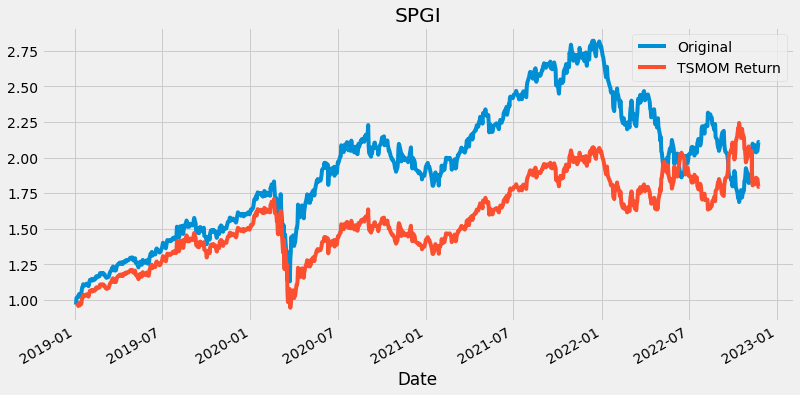

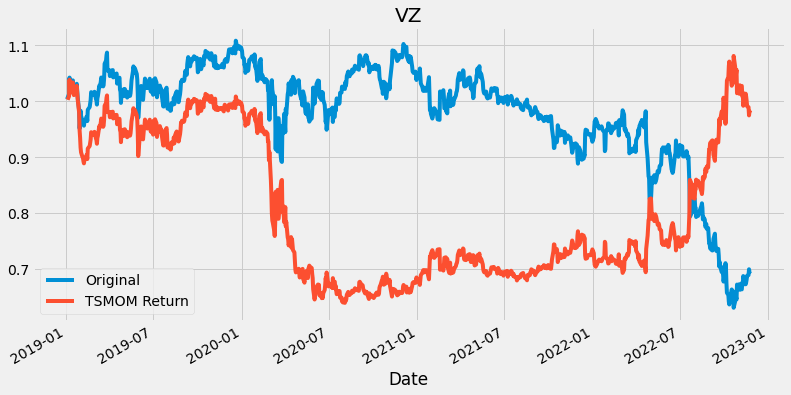

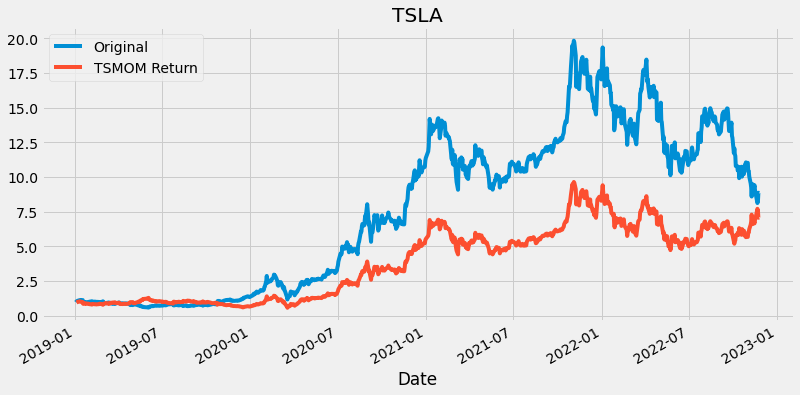

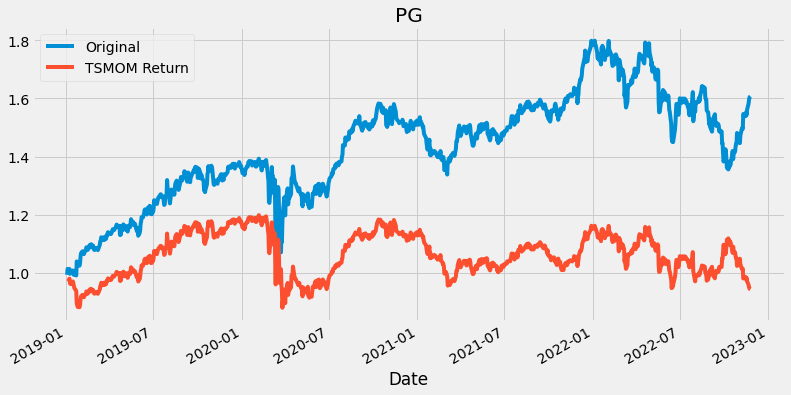

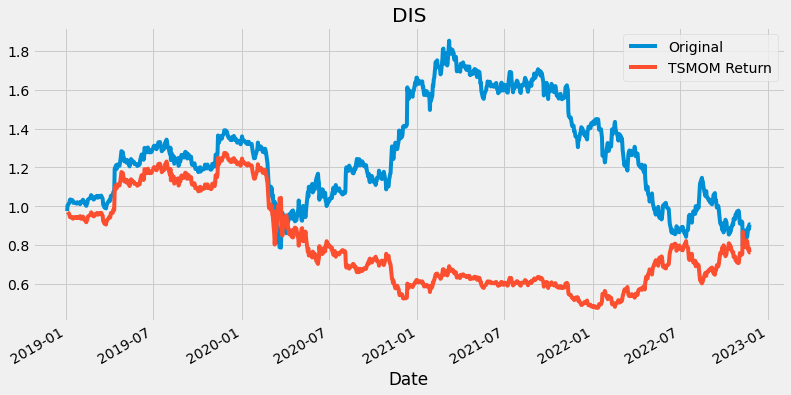

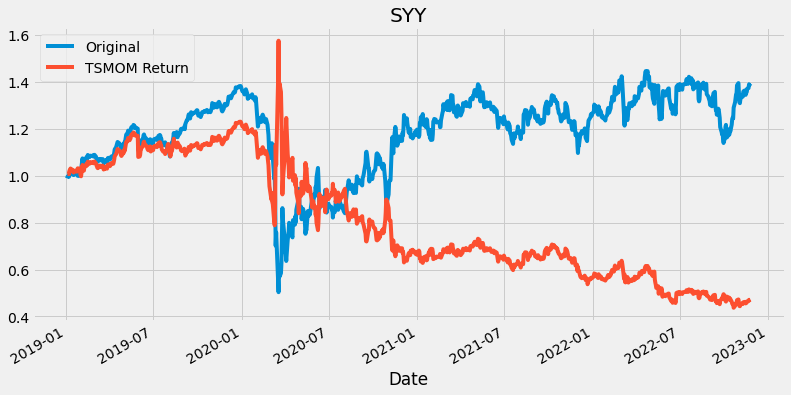

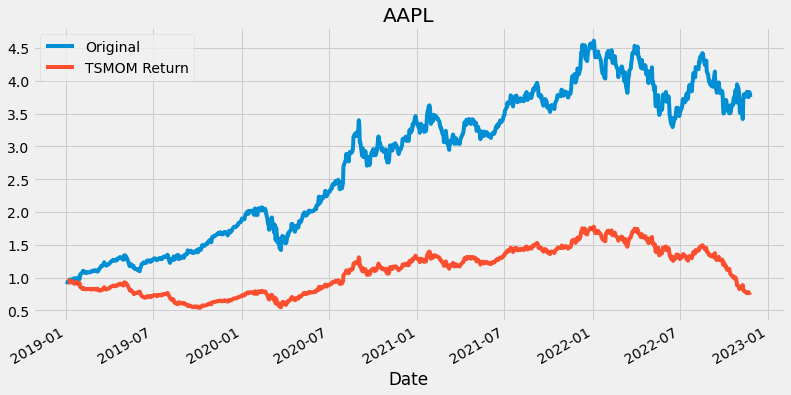

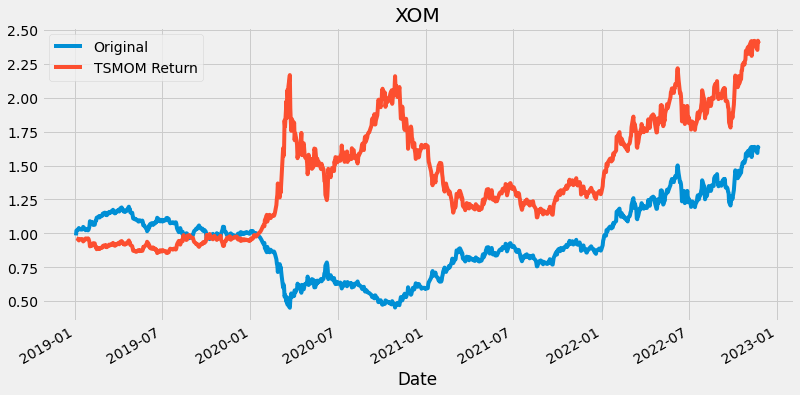

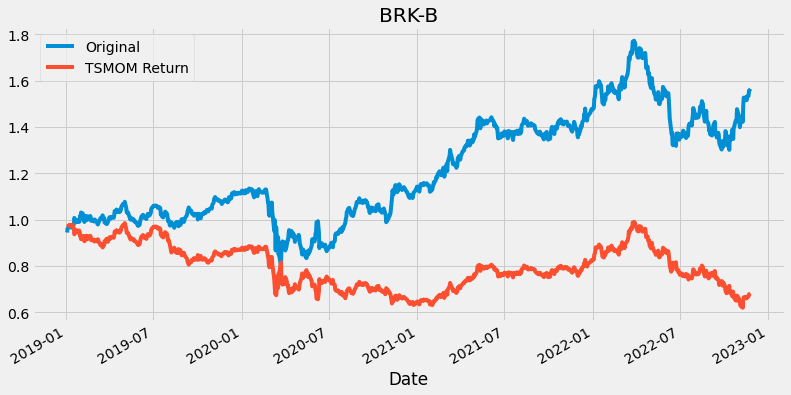

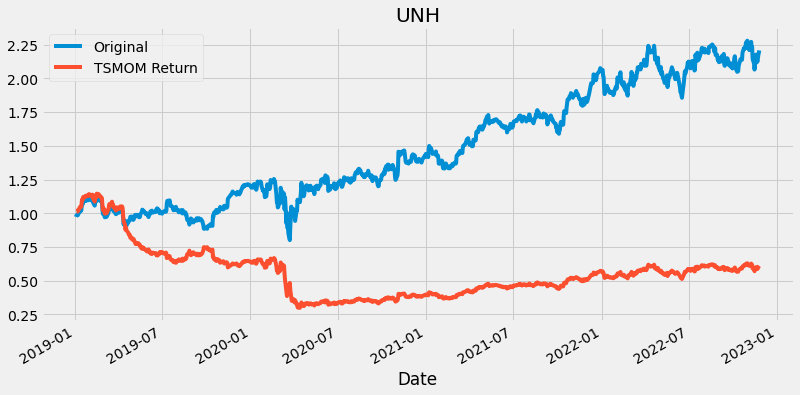

In [3]:
def tsmom_strategy(df, window = 252):
    df = df.copy()
    df['Original'] = np.log(df.Close.pct_change()+1)
    df['prior_n'] = df.Original.rolling(window).sum()
    df.dropna(inplace = True)
    df['position'] = [1 if i > 0 else -1 for i in df.prior_n]
    df['TSMOM Return'] = df.position.shift(1)*df.Original
    return df

strategy = []
for i in range(10):
  df_new = tsmom_strategy(d2[i])
  strategy.append(df_new)
  plt.style.use('fivethirtyeight')
  np.exp(df_new[['Original','TSMOM Return']].cumsum()).plot(figsize=(12,6))
  plt.title(name[i])
  plt.show()

In [4]:
all_pos = []
total = 10000
weights = [0.1, 0.1, 0.1, 0.1, 0.1 ,0.1, 0.1, 0.1, 0.1, 0.1]
for stock_df, allocation in zip(strategy,weights):
  stock_df['Allocation'] = np.exp(stock_df['TSMOM Return'].cumsum()) * allocation
  stock_df['Position'] = stock_df['Allocation']*total
  all_pos.append(stock_df['Position'])

weights.append(1)
portf_val = pd.concat(all_pos, axis=1)
portf_val.columns = name
portf_val['Total Pos'] = portf_val.sum(axis=1)
portf_val.head()

,SPGI,VZ,TSLA,PG,DIS,SYY,AAPL,XOM,BRK-B,UNH,Total Pos
Date,,,,,,,,,,,
2019-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2019-01-04,954.197146,1002.490206,945.450002,979.997854,970.075734,1007.821404,959.058463,964.441339,981.864788,1011.695119,9777.092055
2019-01-07,961.841386,1008.893632,996.845835,976.077490,961.740269,1007.006686,961.197928,959.451985,973.338074,1013.637305,9820.030589
2019-01-08,970.648828,1038.420487,998.006439,979.679995,954.317031,1022.975393,943.217263,952.526400,976.313005,1027.190150,9863.294992
2019-01-09,979.424084,1014.763394,1007.470160,963.680440,943.729507,1018.087023,927.467254,947.528369,976.014709,1028.667904,9806.832844


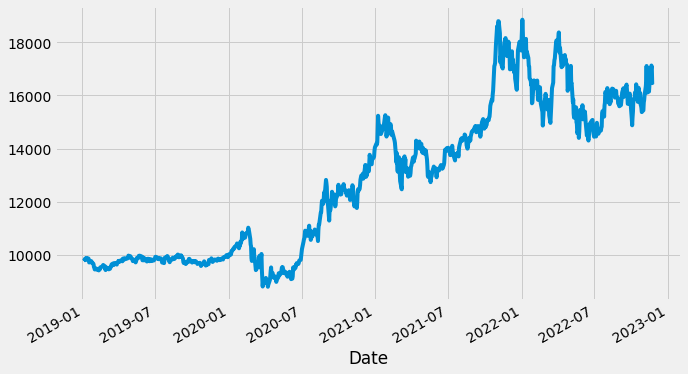

In [5]:
plt.style.use('fivethirtyeight')
n_l = len(portf_val['Total Pos'])
(portf_val['Total Pos'][1:n_l]).plot(figsize=(10,6))
plt.show()

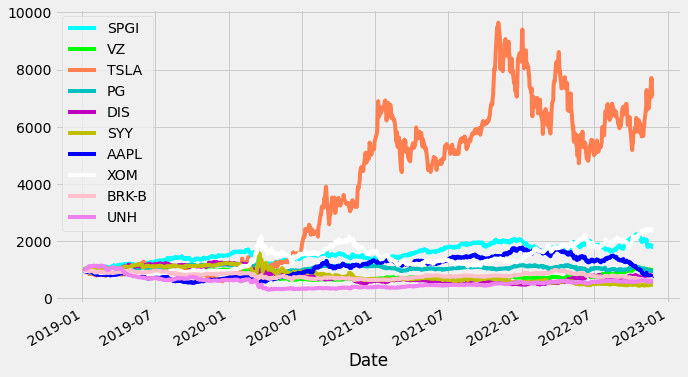

In [6]:
portf_val.drop('Total Pos', axis=1).plot(figsize=(10,6), color=['cyan', 'lime','coral', 'c', 'm', 'y', 'b', 'w','pink','violet'])
plt.show()

## Sharpe Ratio

In [8]:
i = 0
for p in portf_val:
    daily_return = portf_val[p].pct_change(1)
    daily_return.replace([np.inf, -np.inf], np.nan, inplace=True)
    daily_return.dropna(inplace=True)
    Sharpe_Ratio = daily_return.mean() /daily_return.std()
    A_Sharpe_Ratio = (252 ** 0.5)*Sharpe_Ratio
    cm_return = portf_val[p].iloc[-1]/portf_val[p].iloc[1]-1
    i = i + 1
    print(p)
    print('Sharp Ratio:' + str(round(Sharpe_Ratio,3)))
    print('Anual SR:   '    + str(round(A_Sharpe_Ratio,3)))
    print('Cumulative Return '+str(round(100*cm_return,3)) + '%')
    #print('Profit Gain by investing ' +str(invest) +" is "+str(round(invest*cm_return,3)) )
    print(' ')

SPGI
Sharp Ratio:0.043
Anual SR:   0.678
Cumulative Return 88.214%
 
VZ
Sharp Ratio:0.004
Anual SR:   0.07
Cumulative Return -2.333%
 
TSLA
Sharp Ratio:0.07
Anual SR:   1.108
Cumulative Return 648.11%
 
PG
Sharp Ratio:0.004
Anual SR:   0.07
Cumulative Return -3.732%
 
DIS
Sharp Ratio:-0.0
Anual SR:   -0.002
Cumulative Return -21.425%
 
SYY
Sharp Ratio:-0.017
Anual SR:   -0.263
Cumulative Return -53.171%
 
AAPL
Sharp Ratio:0.001
Anual SR:   0.015
Cumulative Return -18.787%
 
XOM
Sharp Ratio:0.052
Anual SR:   0.822
Cumulative Return 148.811%
 
BRK-B
Sharp Ratio:-0.018
Anual SR:   -0.283
Cumulative Return -30.52%
 
UNH
Sharp Ratio:-0.016
Anual SR:   -0.26
Cumulative Return -39.829%
 
Total Pos
Sharp Ratio:0.043
Anual SR:   0.689
Cumulative Return 68.712%
 


In [12]:
strategy[0].head()

,Open,High,Low,Close,Adj Close,Volume,Original,prior_n,position,TSMOM Return,Allocation,Position
Date,,,,,,,,,,,,
2019-01-03,169.289993,169.399994,163.990005,164.369995,158.720428,1569500,-0.032796,-0.022558,-1,NaN,NaN,NaN
2019-01-04,167.029999,172.919998,166.639999,172.259995,166.339249,1946800,0.046885,0.008395,1,-0.046885,0.095420,95419.714593
2019-01-07,171.910004,175.320007,171.910004,173.639999,167.671814,1820500,0.007979,0.001498,1,0.007979,0.096184,96184.138582
2019-01-08,174.759995,175.250000,173.050003,175.229996,169.207138,1426700,0.009115,-0.002679,-1,0.009115,0.097065,97064.882815
2019-01-09,175.139999,176.289993,173.279999,173.660004,167.691116,1280100,-0.009000,-0.020067,-1,0.009000,0.097942,97942.408398


## P/L

In [14]:
tsmom_strategy_ret_df = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10]
tsmom_investment_ret_df = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10]
total_investment_ret = [0]*10

In [15]:
# total investment_value $1 million
# calculate return 
for j in range(10):
    df_ret = pd.DataFrame(np.diff(strategy[j]['Close'])).rename(columns = {0:'returns'})
    tsmom_strategy_ret = []
    
    for i in range(len(df_ret)):
        returns = df_ret['returns'][i]*(strategy[j]['position'][i])
        tsmom_strategy_ret.append(returns)
    
    tsmom_strategy_ret_df[j] = pd.DataFrame(tsmom_strategy_ret).rename(columns = {0:'tsmom_returns'})

    # calculate investement return 
    investment_value = 100000
    number_of_stocks = floor(investment_value/(strategy[j]['Close'][0]))
    tsmom_investment_ret = []
    
    for i in range(len(tsmom_strategy_ret_df[j]['tsmom_returns'])):
        returns = number_of_stocks*tsmom_strategy_ret_df[j]['tsmom_returns'][i]
        tsmom_investment_ret.append(returns)
    
    tsmom_investment_ret_df[j] = pd.DataFrame(tsmom_investment_ret).rename(columns = {0:'investment_returns'})
    total_investment_ret[j] = round(sum(tsmom_investment_ret_df[j]['investment_returns']), 2)

In [16]:
total_investment_ret

[110923.48,
 -8001.02,
 1238871.44,
 -6992.98,
 -34215.99,
 -88389.55,
 -73496.62,
 98624.34,
 -38996.87,
 -10191.28]

In [17]:
for i in range(10):
    investment_value = 100000
    profit_percentage = floor((total_investment_ret[i]/investment_value)*100)
    print(cl('Profit gained from the RSI strategy by investing $100k in {} : {}'.format(name[i],total_investment_ret[i]), attrs = ['bold']))
    print(cl('Profit percentage of the RSI strategy: {}%'.format(profit_percentage), attrs = ['bold']))

Profit gained from the RSI strategy by investing $100k in SPGI : 110923.48
Profit percentage of the RSI strategy: 110%
Profit gained from the RSI strategy by investing $100k in VZ : -8001.02
Profit percentage of the RSI strategy: -9%
Profit gained from the RSI strategy by investing $100k in TSLA : 1238871.44
Profit percentage of the RSI strategy: 1238%
Profit gained from the RSI strategy by investing $100k in PG : -6992.98
Profit percentage of the RSI strategy: -7%
Profit gained from the RSI strategy by investing $100k in DIS : -34215.99
Profit percentage of the RSI strategy: -35%
Profit gained from the RSI strategy by investing $100k in SYY : -88389.55
Profit percentage of the RSI strategy: -89%
Profit gained from the RSI strategy by investing $100k in AAPL : -73496.62
Profit percentage of the RSI strategy: -74%
Profit gained from the RSI strategy by investing $100k in XOM : 98624.34
Profit percentage of the RSI strategy: 98%
Profit gained from the RSI strategy by investing $100k in B

In [18]:
all_investment_value = 1000000
all_investment_ret = round(sum(total_investment_ret), 2)
all_profit_percentage = floor((all_investment_ret/all_investment_value)*100)
print(cl('Profit gained from the RSI strategy by investing 1 million in portfolio : {}'.format(all_investment_ret), attrs = ['bold']))
print(cl('Profit percentage of the RSI strategy: {}%'.format(all_profit_percentage), attrs = ['bold']))

Profit gained from the RSI strategy by investing 1 million in portfolio : 1188134.95
Profit percentage of the RSI strategy: 118%
